## Cross-country compare

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# load cleaned files

In [2]:
ben = pd.read_csv("data/benin_clean.csv", parse_dates=["Timestamp"])
sle = pd.read_csv("data/sierraleone_clean.csv", parse_dates=["Timestamp"])
tgo = pd.read_csv("data/togo_clean.csv", parse_dates=["Timestamp"])

In [3]:
ben["country"]="Benin"
sle["country"]="SierraLeone"
tgo["country"]="Togo"
df = pd.concat([ben, sle, tgo], ignore_index=True)

# Boxplots side-by-side for GHI

Text(0.5, 1.0, 'GHI distribution by country')

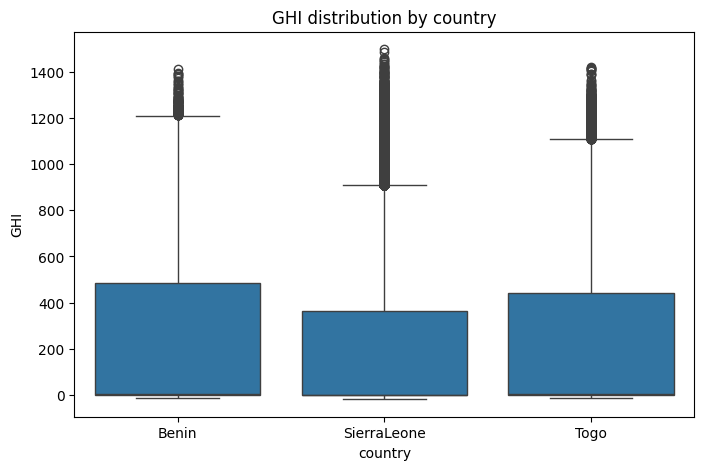

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x="country", y="GHI", data=df)
plt.title("GHI distribution by country")

# summary table: mean, median, std

In [6]:
summary = df.groupby("country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary.columns = ["_".join(col).strip() for col in summary.columns.values]
display(summary.reset_index())

,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.56,1.8,331.13,167.19,-0.1,261.71,115.36,1.6,158.69
1,SierraLeone,201.96,0.3,298.50,116.38,-0.1,218.65,113.72,-0.1,158.95
2,Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


# One-way ANOVA on GHI

In [7]:
ben_ghi = ben["GHI"].dropna()
sle_ghi = sle["GHI"].dropna()
tgo_ghi = tgo["GHI"].dropna()

In [8]:
f_stat, p_val = stats.f_oneway(ben_ghi, sle_ghi, tgo_ghi)
print("ANOVA on GHI: F=%.3f, p=%.4g" % (f_stat, p_val))

ANOVA on GHI: F=2090.093, p=0



# If ANOVA assumptions fail, run Kruskal-Wallis

In [9]:
h_stat, p_kw = stats.kruskal(ben_ghi, sle_ghi, tgo_ghi)
print("Kruskal-Wallis on GHI: H=%.3f, p=%.4g" % (h_stat, p_kw))

Kruskal-Wallis on GHI: H=4524.883, p=0


# Ranking bar chart by mean GHI

<Axes: title={'center': 'Average GHI by country'}, xlabel='country'>

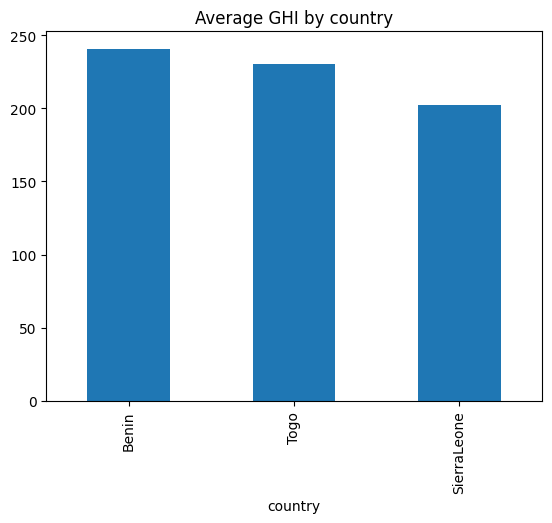

In [10]:
mean_ghi = df.groupby("country")["GHI"].mean().sort_values(ascending=False)
mean_ghi.plot(kind="bar", title="Average GHI by country")

### ✅ Done